In [195]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [240]:
with open("game_data.json", "r") as file:
    json_data = json.load(file)

In [241]:
games_df = pd.DataFrame(json_data)

In [242]:
def print_winning_percentages(game_results, subtitle):
    winning_positions = game_results['table_stats'].apply(lambda x: int(x['winning_position']))
    winning_positions = winning_positions[winning_positions != 0]
    win_counts = winning_positions.value_counts()

    # Create the bar chart
    bars = plt.bar(win_counts.keys(), win_counts.values)
    plt.xlabel("Player Position")
    plt.ylabel("Number of Wins")
    plt.title(f"Wins by Player Position in {subtitle}")
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()

There are 8876 4-player games in the dataset out of 20439 total games


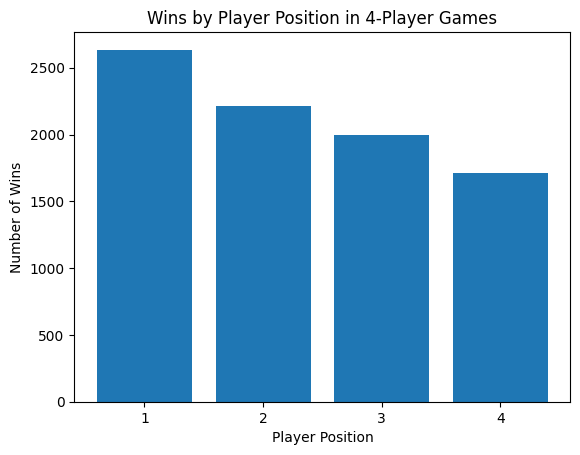

In [243]:
four_player_games = games_df[games_df['table_stats'].apply(lambda x: x['player_number']) == "4"]
print(f"There are {len(four_player_games)} 4-player games in the dataset out of {len(games_df)} total games")
print_winning_percentages(four_player_games, "4-Player Games")

There are 4406 3-player games in the dataset out of 20439 total games


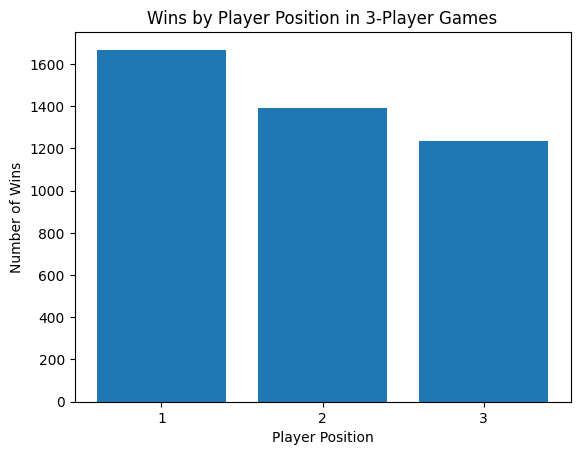

In [244]:
three_player_games = games_df[games_df['table_stats'].apply(lambda x: x['player_number']) == "3"]
print(f"There are {len(three_player_games)} 3-player games in the dataset out of {len(games_df)} total games")
print_winning_percentages(three_player_games, "3-Player Games")

In [245]:
def all_players_above(players, elo):
    for player in players:
        if float(player['rank_after_game']) < elo:
            return False
    return True

There are 253 high ELO 4-player games in the dataset out of 20439 total games


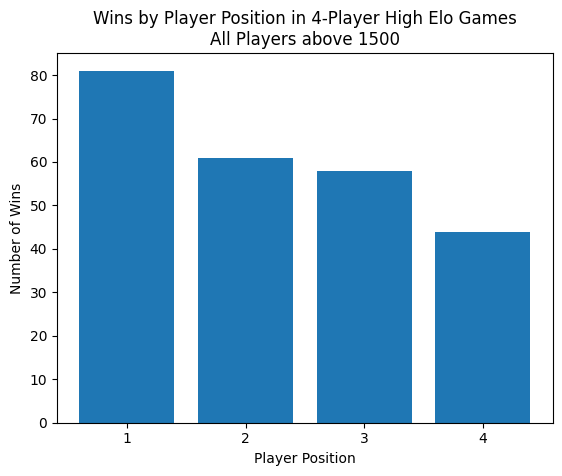

In [246]:
high_elo_four = four_player_games[four_player_games['players'].apply(lambda x: all_players_above(x, 1500))]
print(f"There are {len(high_elo_four)} high ELO 4-player games in the dataset out of {len(games_df)} total games")
print_winning_percentages(high_elo_four, "4-Player High Elo Games\nAll Players above 1500")

There are 3220 high ELO 4-player games in the dataset out of 20439 total games


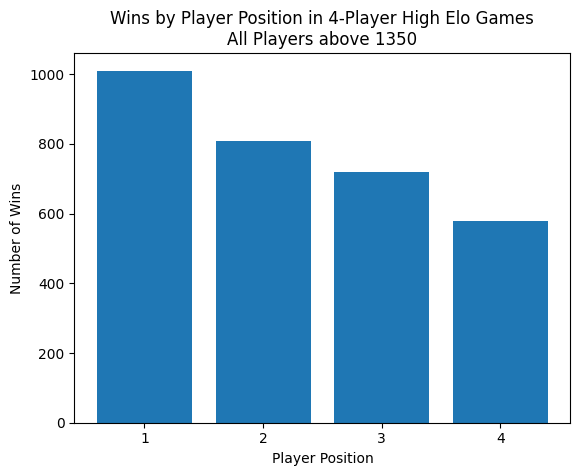

In [247]:
medium_elo_four = four_player_games[four_player_games['players'].apply(lambda x: all_players_above(x, 1350))]
print(f"There are {len(medium_elo_four)} high ELO 4-player games in the dataset out of {len(games_df)} total games")
print_winning_percentages(medium_elo_four, "4-Player High Elo Games\nAll Players above 1350")